In [1]:
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
import tensorflow as tf

2024-05-08 13:19:49.174125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 13:19:49.174229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 13:19:49.301989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_folder="/kaggle/input/cityscapes_data/cityscapes_data/train"
valid_folder="/kaggle/input/cityscapes_data/cityscapes_data/val"
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder)) 
num_of_testing_samples = len(os.listdir(valid_folder))

In [3]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [4]:
def getSegmentationArr(mask, classes, width=width, height=height):
    masked=mask.reshape((mask.shape[0]*mask.shape[1],3))
    pred=kmeans.predict(masked)
    pred.shape
    pred=pred.reshape(mask.shape[0],mask.shape[1])
    
    seg_labels = np.zeros((height, width, classes))
    
    for c in range(classes):
        seg_labels[:, :, c] = (pred == c ).astype(int)
    return seg_labels

In [6]:
train_list=os.listdir('../input/cityscapes_data/train')
from tqdm import tqdm
colors=[]

for i in tqdm(range(150)):
    x,y=LoadImage(train_list[i],train_folder)
    colors.append(y.reshape(y.shape[0]*y.shape[1],3))

100%|██████████| 150/150 [00:00<00:00, 204.95it/s]


In [7]:
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))
colors.shape

(9830400, 3)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(colors)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=0)

In [9]:
kmeans.cluster_centers_

array([[128.01373551,  63.76865677, 127.0673482 ],
       [ 81.85165822,   7.42693211,  68.7271176 ],
       [107.56029119, 139.31665687,  39.71655281],
       [236.17797799,  40.26804687, 224.23347366],
       [ 70.73527199,  70.43847933,  68.57493563],
       [  7.92958006,  38.9774773 ,  87.79670385],
       [  4.31577329,   3.05179535,   4.52969021],
       [ 77.78286003, 126.10188378, 170.01420147],
       [201.1394639 ,  26.42022632,  59.26517624],
       [191.4074716 , 154.09764129, 156.20676887],
       [161.50401332, 242.51221716, 158.96771621],
       [  3.11421031,   1.34681356, 138.81549363],
       [215.79467642, 199.26483033,  42.83912948]])

In [10]:
def give_color_to_seg_img(seg, n_classes=classes):
    
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [11]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342]) 
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])
       
                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

In [12]:
im,mask=LoadImage(train_list[4],train_folder)
c1=getSegmentationArr(mask, classes, width=width, height=height)
#c=give_color_to_seg_img(np.argmax(c1,axis=-1), n_classes=13)
c=addColors(np.argmax(c1,axis=-1))

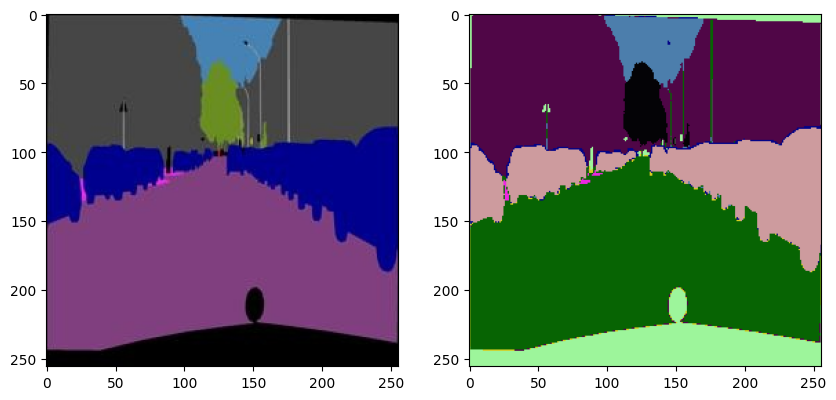

In [13]:
fig,ax=plot.subplots(1,2,figsize=(10,10))
ax[0].imshow(mask)
ax[1].imshow(c)
plot.show()

In [14]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                image, mask = LoadImage(file, path)
                labels = getSegmentationArr(mask, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [15]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(valid_folder, batch_size=batch_size)

In [16]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

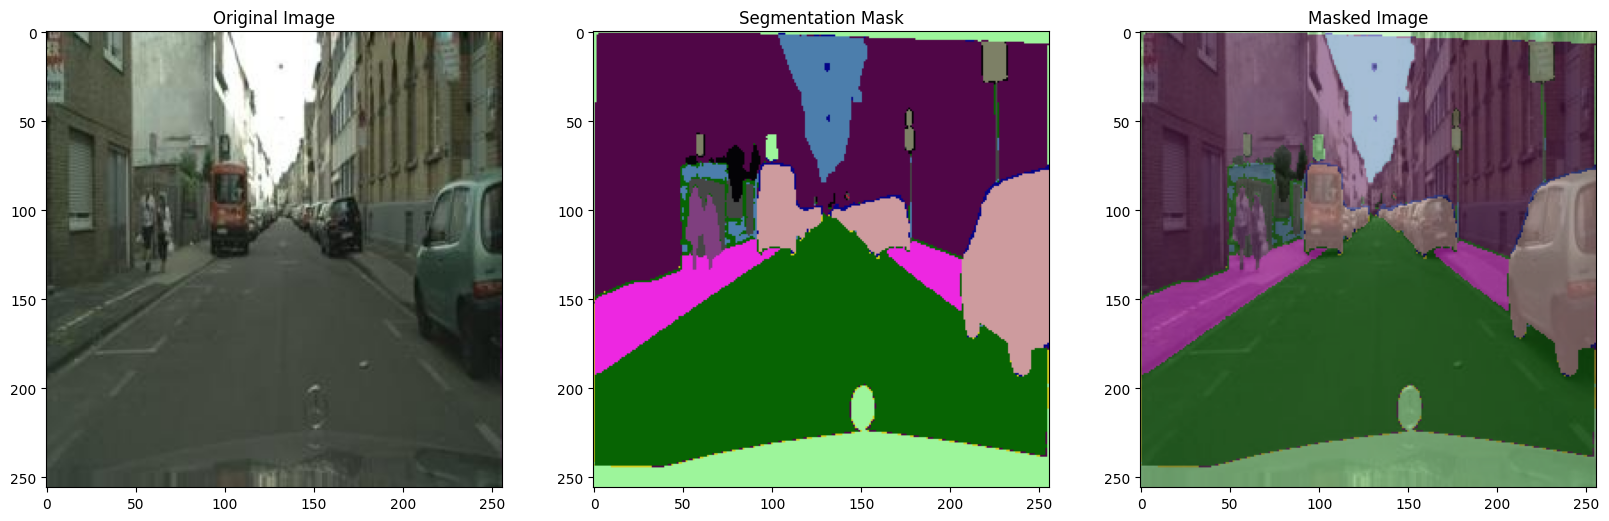

In [17]:
image = imgs[7]
mask = addColors(np.argmax(segs[7], axis=-1))
masked_image = cv2.addWeighted(image, 0.5, mask,0.5, 0)

fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
#predimg = cv2.addWeighted(imgs[i]/255, 0.6, _p, 0.4, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [18]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

## Basic SegNet arhcitecture

In [19]:
def segnet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    #step1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1=BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    #step2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    #step3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    #step4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    #step5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    #step6
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge6 = concatenate([conv5,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6=BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6=BatchNormalization()(conv6)
    
    #step7
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv4,up7], axis = 3)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7=BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7=BatchNormalization()(conv7)
    
    #step8
    up8 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv3,up8], axis = 3)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8=BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8=BatchNormalization()(conv8)

    #step9
    up9 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv2,up9], axis = 3)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9=BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9=BatchNormalization()(conv9)
    
    #step10   
    up10 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer = 'he_normal')(UpSampling2D(size=(2,2))(conv9))
    merge10 = concatenate([conv1,up10],axis=3)
    conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10=BatchNormalization()(conv10)
    conv10 = Conv2D(13, 1, activation = 'softmax')(conv10)

    model = Model(inputs,conv10)
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
             loss="categorical_crossentropy",
             metrics=["accuracy"])    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [20]:
model=segnet(pretrained_weights = None,input_size = (256,256,3))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_6[0][0]  

 Total params: 73,614,477 (280.82 MB)

 Trainable params: 73,594,125 (280.74 MB)

 Non-trainable params: 20,352 (79.50 KB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(train_gen, epochs=30, steps_per_epoch=num_of_training_samples//batch_size,
                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size,
                   callbacks=[early_stop,reduce_lr])

Epoch 1/30


2024-05-08 13:25:24.627601: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,64,256,256]{3,2,1,0}, f32[10,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-08 13:25:25.339159: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.711673778s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,64,256,256]{3,2,1,0}, f32[10,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-08 13:25:27.442751: E external/

296/297 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.6523 - loss: 1.2596

2024-05-08 13:31:30.757606: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,128,256,256]{3,2,1,0}, f32[5,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-08 13:31:30.900848: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.143370788s
Trying algorithm eng0{} for conv (f32[64,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,128,256,256]{3,2,1,0}, f32[5,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-08 13:31:32.970718: E external/

297/297 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.6529 - loss: 1.2575 - val_accuracy: 0.7771 - val_loss: 0.7821 - learning_rate: 1.0000e-04
Epoch 2/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 252s 849ms/step - accuracy: 0.8045 - loss: 0.6918 - val_accuracy: 0.7987 - val_loss: 0.6978 - learning_rate: 1.0000e-04
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 251s 846ms/step - accuracy: 0.8276 - loss: 0.5923 - val_accuracy: 0.8103 - val_loss: 0.6501 - learning_rate: 1.0000e-04
Epoch 4/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 252s 848ms/step - accuracy: 0.8405 - loss: 0.5396 - val_accuracy: 0.8179 - val_loss: 0.6292 - learning_rate: 1.0000e-04
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 251s 847ms/step - accuracy: 0.8500 - loss: 0.5004 - val_accuracy: 0.8143 - val_loss: 0.6505 - learning_rate: 1.0000e-04
Epoch 6/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 252s 847ms/step - accuracy: 0.8581 - loss: 0.4683 - val_accuracy: 0.8121 - val_loss: 0.6587 - learning_rate: 1.0000e-04
Epoch 7/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 252s 847ms/ste

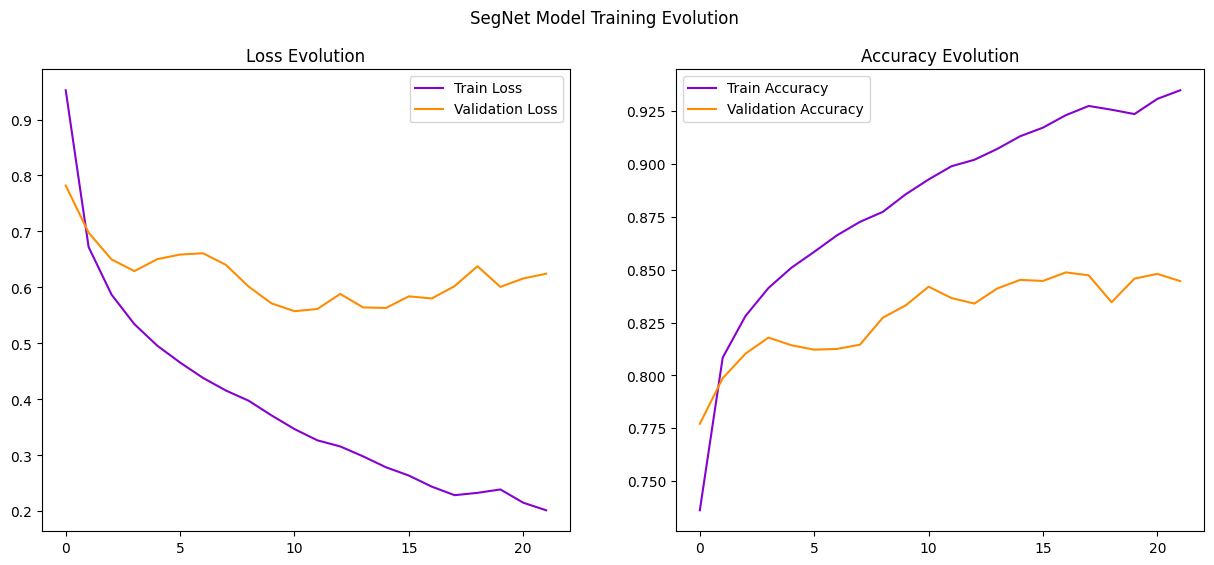

In [22]:
import matplotlib.pyplot as plt

# Assuming 'model' is already defined and compiled
# Plotting the training and validation loss

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('SegNet Model Training Evolution')
plt.show()

In [23]:
import cv2
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

In [24]:
r=model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


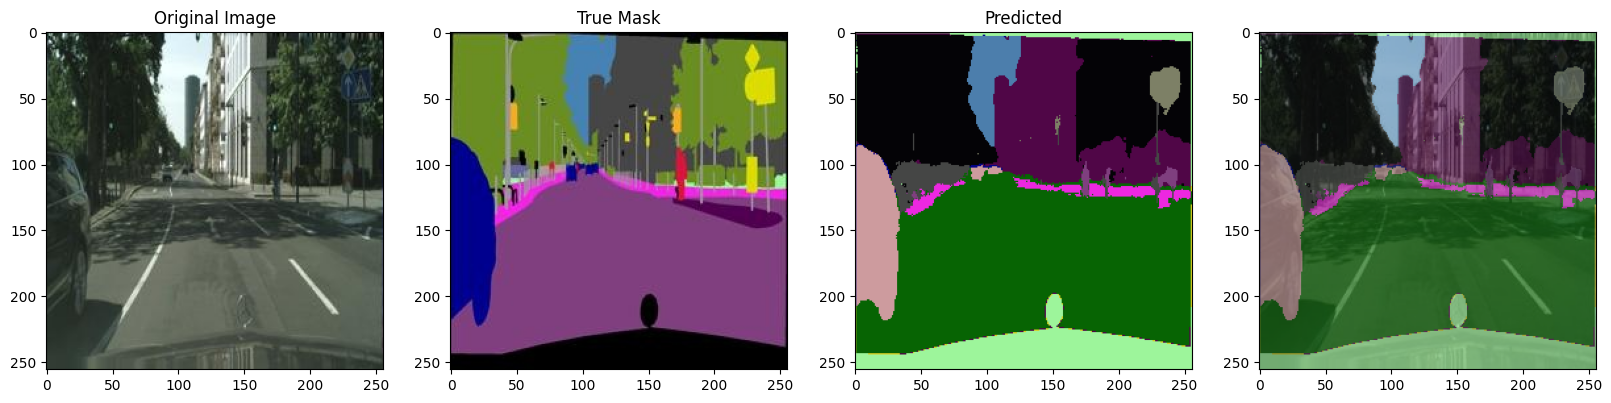

In [25]:
from cv2 import *
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

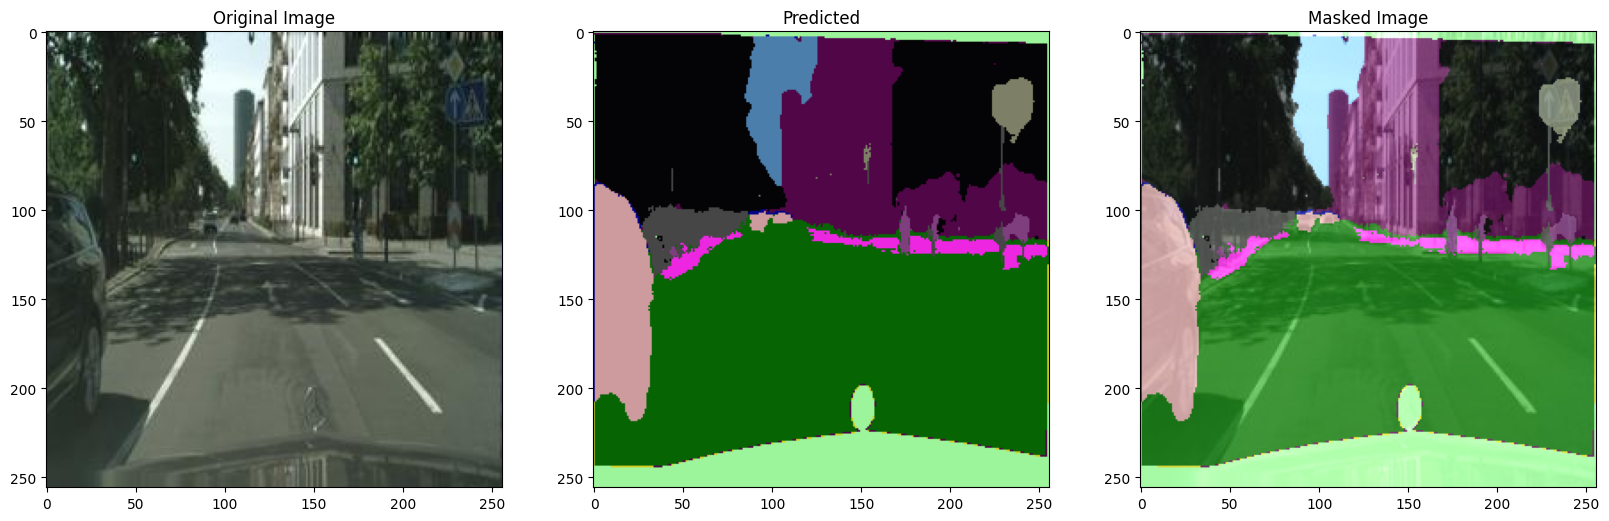

In [26]:
from cv2 import *
fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.5,s,0.9, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [ ]:
model.save('segnet.h5') 

Segnet with Mobilenetv2 as encoder